In [2]:
import os
import sys
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

from scipy.stats import betabinom
from scipy.optimize import minimize

script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions4 import *
from misc import *
from sinkhorn import * 

datadir = "../../../gdrive/github_data/pyJSMF-RAW-data"

## Simple data

In [2]:
n = 1000
p = 1200 ## make this larger to increase difficulty
n_top = 20 ## number of top words in each topic
k = 3
doc_len = 80
np.random.seed(123)

X, Atrue, Ftrue, p0, Ltrue = smallsim_independent(n = n, p = p, k = k, doc_len = doc_len, 
                                           n_top = n_top, returnL=True)
w_idx = np.where(X.sum(axis = 0) > 0)[0]
X = X[:,w_idx]

Pi_true = Ltrue @ Ftrue.T



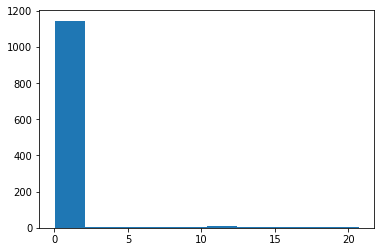

In [3]:
Pi = X / X.sum(axis = 1)[:, None]
C = Pi.T @ Pi

plt.hist(C.sum(axis = 1))
plt.show()

Cbar = C / C.sum(axis = 1).max()

In [5]:
S, _, _ = findS(Cbar, k)
S

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 3 basis vectors by [sparsePartial] method.
  - Elapsed time = 0.0323 seconds



array([41,  2, 30])

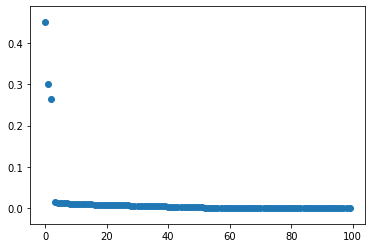

In [16]:
sigma = np.linalg.svd(Cbar, full_matrices=False, compute_uv=False)

plt.scatter([i for i in range(100)], sigma[:100])
plt.show()

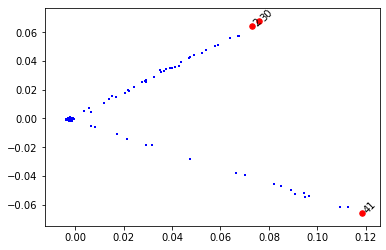

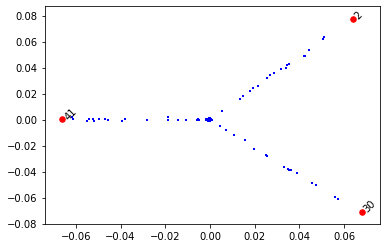

In [17]:

Cbar_pj = pca_proj(Cbar)
vis_extremal_pca(Cbar_pj, S, [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S, [1, 2], annotate=True, fontsize=10)

## More realistic data

In [5]:
## load data
dataname = "sla"
k = 6
rate=3

datafile=f"{datadir}/fit_sim_{dataname}_fastTopics_k{k}_rate{rate}.pkl"
with open(datafile, "rb") as f:
    fitted = pickle.load(f)
    
X = fitted['X'].toarray()
L = fitted['Ltrue']
F = fitted['Ftrue']

n, p = X.shape

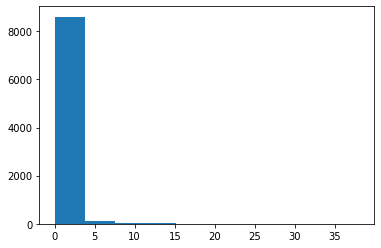

In [6]:
Pi = X / X.sum(axis = 1)[:, None]
C = Pi.T @ Pi

plt.hist(C.sum(axis = 1))
plt.show()

Cbar = C / C.sum(axis = 1).max()

In [8]:
svd = TruncatedSVD(n_components=30, random_state=42)
svd.fit(Cbar)


TruncatedSVD(algorithm='randomized', n_components=30, n_iter=5, random_state=42,
             tol=0.0)

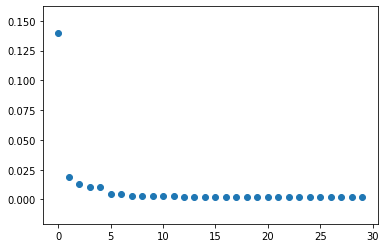

In [10]:
plt.scatter([i for i in range(30)], svd.singular_values_)
plt.show()

In [11]:
S, _, _ = findS(Cbar, k)
S

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 2.5121 seconds



array([4909, 7914, 1821, 2637, 4923, 6569])

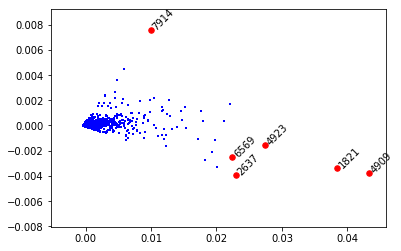

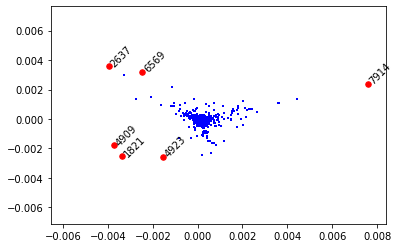

In [12]:
Cbar_pj = pca_proj(Cbar)
vis_extremal_pca(Cbar_pj, S, [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj, S, [1, 2], annotate=True, fontsize=10)

In [13]:
Pi_true = L @ F.T
C_true = Pi_true.T @ Pi_true
pca = PCA(n_components=10)
pca.fit(C_true / C_true.sum(axis = 1).max())
Cbar_pj_true= pca.transform(Cbar)
Ctrue_pj = pca.transform(C_true / C_true.sum(axis = 1).max())
Ctrue_bar_pj = Cbar_proj(C_true)

In [14]:
S0, _, _ = findS(C_true / C_true.sum(axis = 1).max(), k)
S0

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 6 basis vectors by [sparsePartial] method.
  - Elapsed time = 2.6477 seconds



array([4909, 7914, 2637, 7071, 2205, 8131])

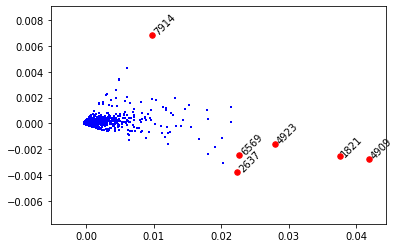

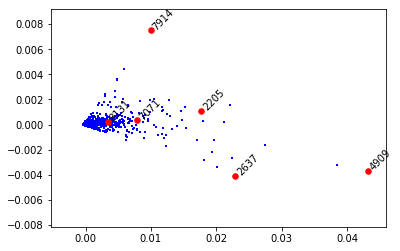

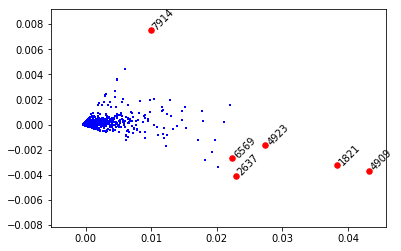

In [19]:
vis_extremal_pca(Ctrue_pj, S, [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj_true, S0, [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Cbar_pj_true, S, [0, 1], annotate=True, fontsize=10)

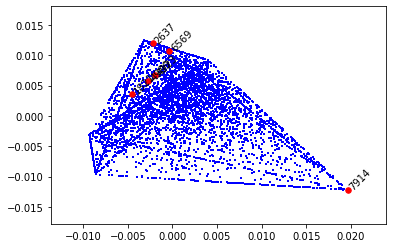

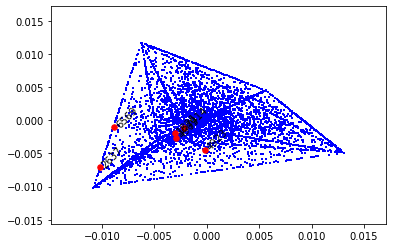

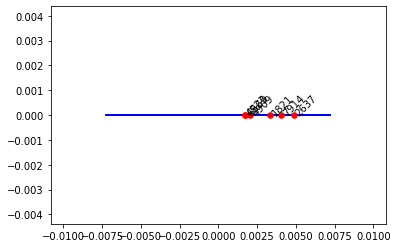

In [20]:
vis_extremal_pca(Ctrue_bar_pj, S, [0, 1], annotate=True, fontsize=10)
vis_extremal_pca(Ctrue_bar_pj, S, [2, 3], annotate=True, fontsize=10)
vis_extremal_pca(Ctrue_bar_pj, S, [4, 5], annotate=True, fontsize=10)


